### Student Information
Name: 許靜媛

Student ID: 109065537

GitHub ID: jysgit

Kaggle name: catyyy

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [115]:
# Answer here

<AxesSubplot:title={'center':'word frequency for Top 30 words in training data'}>

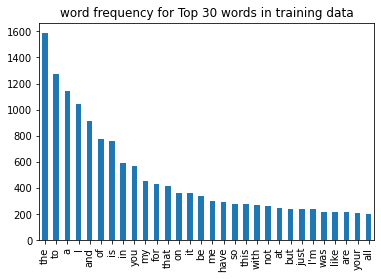

In [9]:
train_text = train_df['text']

train_token = []
for t in train_text:
    train_token.extend(t.split())

pd.Series(train_token).value_counts()[:30].plot(kind = 'bar',
                                           title = 'word frequency for Top 30 words in training data'
                                           )

<AxesSubplot:title={'center':'word frequency for Top 30 words in test data'}>

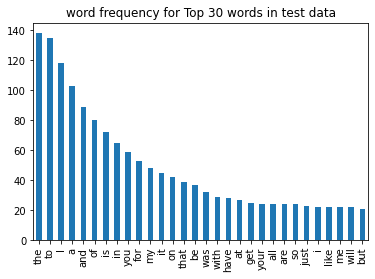

In [152]:
test_text = test_df['text']

test_token = []
for t in test_text:
    test_token.extend(t.split())

pd.Series(test_token).value_counts()[:30].plot(kind = 'bar',
                                           title = 'word frequency for Top 30 words in test data'
                                           )

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [36]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
vectorizer = TfidfVectorizer(max_features=1000)

In [62]:
train_tfidf = vectorizer.fit_transform(train_df.text)

In [63]:
f_names = vectorizer.get_feature_names()

In [64]:
f_names[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here

上面的圖將 Confusion Matrix 以視覺化的方式畫出，因為有四種情緒，所以是 4x4 的矩陣。
Confusion Matrix 是用於分類問題的一種常用指標，
縱軸是模型預測的答案，橫軸是實際上的正確答案，
顏色越深表示數字越大，所以透過此圖可以了解到，在預測 fear 時的 True Positive 最高，
表示模型最擅長預測 fear。
在預測 sadness 的 TP 值最低，表示模型最不會預測 sadness。
另外，fear, anger, sadness經常會被搞混

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [91]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

In [92]:
## build DecisionTree model
mnb = MultinomialNB()

## training!
mnb_model = mnb.fit(X_train, y_train)

## predict!
m_y_train_pred = mnb_model.predict(X_train)
m_y_test_pred = mnb_model.predict(X_test)

## so we get the pred result
m_y_test_pred[:10]

array(['joy', 'fear', 'sadness', 'anger', 'anger', 'joy', 'anger',
       'sadness', 'anger', 'joy'], dtype='<U7')

In [95]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

m_cm = confusion_matrix(y_true=y_test, y_pred=m_y_test_pred) 
print(m_cm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


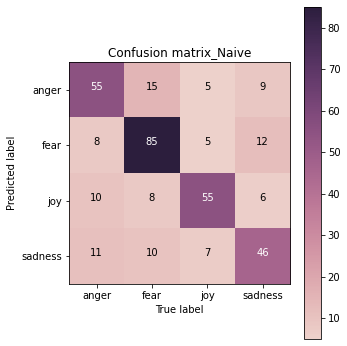

In [100]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(m_cm, classes=my_tags, title='Confusion matrix_Naive')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
綜觀來說，Naive Bayes 模型的表現比 Decision Tree 好，大部分的TP值都比較高，
但 Decision Tree model 的ＴＰ值分布比較緊密，最大值跟最小值只差69, 而Naive Bayes模型差了80, 
Naive Bayes model 比較不擅長預測 sadness , 在 sadness 的表現全都比 decision tree model 差，

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [79]:
# Answer here

In [1]:
import matplotlib.pyplot as plt

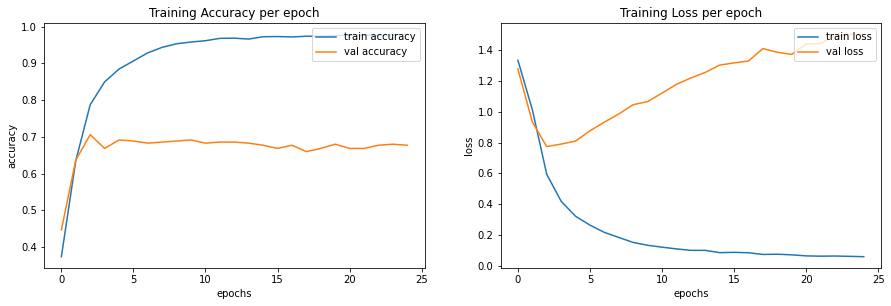

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4.5))

# 設定小圖 ax1 的坐標軸標籤, 格線顏色、種類、寬度, y軸繪圖範圍, 最後用 plot 繪圖
ax1.plot(training_log['accuracy'])
ax1.plot(training_log['val_accuracy'])
ax1.set_title('Training Accuracy per epoch')
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['train accuracy', 'val accuracy'], loc='upper right') 


# 設定小圖 ax2 的坐標軸標籤, 格線顏色、種類、寬度, 最後用 plot 繪圖
ax2.plot(training_log['loss'])
ax2.plot(training_log['val_loss'])
ax2.set_title('Training Loss per epoch')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend(['train loss', 'val loss'], loc='upper right')

# 用 savefig 儲存圖片, 用 show 顯示圖片
fig.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [84]:
# Answer here
words = [ "angry", "happy", "sad", "fear" ]

In [103]:
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

hw_target_words = happy_words + angry_words + sad_words + fear_words
print('\nhw_target words: ')
print(hw_target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

hw_target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hi

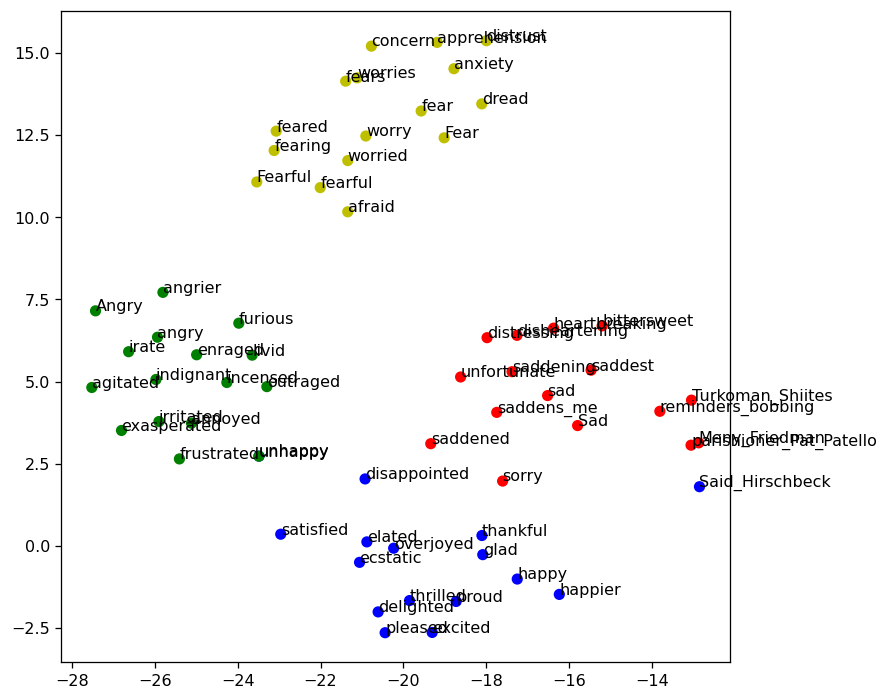

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(hw_target_words)
all_word = list(model.vocab.keys())
word_train = hw_target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(hw_target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()